In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
import natsort
import glob
import tqdm
import os

In [2]:
CLASS_NUM = 10

IMG_W = 2988
IMG_H = 2988

RESIZE_W = 500
RESIZE_H = 500

SAVE_DIR = 'D:/Classification/realData_original/change_random_crop_bg/'
IMAGE_DIR = 'D:/Classification/realData_original/remove_bg_save/final_image_class/'

SUPER_BG_DIR = 'D:/Classification/realData_original/background/'
BASIC_BG_DIR = 'D:/Classification/realData_original/basic_bg/'


In [3]:
def replace_dir(list_):
    tempList = []
    for i in list_:
        tempList.append(i.replace('\\','/'))
    
    return tempList

In [ ]:
def read_bg_list(remove_imgList):
    
    mix_bgList= []
    for temp in remove_imgList:
        bg = cv2.imread(temp, -1)
        
        plus_bg = cv2.resize(bg, ( RESIZE_W,RESIZE_H ),interpolation=cv2.INTER_CUBIC)
        mix_bgList.append(plus_bg)
        
    return mix_bgList

In [4]:
for i in range(CLASS_NUM):
    os.mkdir(SAVE_DIR+str(i))

In [4]:
save_dir_list = glob.glob(SAVE_DIR +'*')
save_dir_list = natsort.natsorted(save_dir_list)

save_dir_list = replace_dir(save_dir_list)
save_dir_list

['D:/Classification/realData_original/change_random_crop_bg/0',
 'D:/Classification/realData_original/change_random_crop_bg/1',
 'D:/Classification/realData_original/change_random_crop_bg/2',
 'D:/Classification/realData_original/change_random_crop_bg/3',
 'D:/Classification/realData_original/change_random_crop_bg/4',
 'D:/Classification/realData_original/change_random_crop_bg/5',
 'D:/Classification/realData_original/change_random_crop_bg/6',
 'D:/Classification/realData_original/change_random_crop_bg/7',
 'D:/Classification/realData_original/change_random_crop_bg/8',
 'D:/Classification/realData_original/change_random_crop_bg/9']

In [6]:
file_list = glob.glob( IMAGE_DIR+ '*' )
replaceFile = []

replaceFile = replace_dir(file_list)
img_list = natsort.natsorted(replaceFile)

len(img_list), img_list[0]

(10, 'D:/Classification/realData_original/remove_bg_save/final_image_class/0')

In [7]:
remove_original_imgList = []
for dir_ in img_list:
    temp = glob.glob(dir_+'/*')
    temp = natsort.natsorted(temp)
    re_ = replace_dir(temp)
    remove_original_imgList.append(re_)

len(remove_original_imgList), remove_original_imgList[0]

(10,
 ['D:/Classification/realData_original/remove_bg_save/final_image_class/0/0.jpg',
  'D:/Classification/realData_original/remove_bg_save/final_image_class/0/1.jpg',
  'D:/Classification/realData_original/remove_bg_save/final_image_class/0/2.jpg',
  'D:/Classification/realData_original/remove_bg_save/final_image_class/0/3.jpg',
  'D:/Classification/realData_original/remove_bg_save/final_image_class/0/4.jpg',
  'D:/Classification/realData_original/remove_bg_save/final_image_class/0/5.jpg',
  'D:/Classification/realData_original/remove_bg_save/final_image_class/0/6.jpg',
  'D:/Classification/realData_original/remove_bg_save/final_image_class/0/7.jpg',
  'D:/Classification/realData_original/remove_bg_save/final_image_class/0/8.jpg',
  'D:/Classification/realData_original/remove_bg_save/final_image_class/0/9.jpg',
  'D:/Classification/realData_original/remove_bg_save/final_image_class/0/10.jpg',
  'D:/Classification/realData_original/remove_bg_save/final_image_class/0/11.jpg',
  'D:/Cla

In [9]:
file_dir = glob.glob( SUPER_BG_DIR + '*.*')

remove_imgList = natsort.natsorted(replace_dir(file_dir))
len(remove_imgList)

110

In [10]:
basic_dir = glob.glob( BASIC_BG_DIR + '*.*')

basic_imgList = natsort.natsorted(replace_dir(basic_dir))
len(basic_imgList)

110

In [11]:
mix_bgList = read_bg_list(remove_imgList)
mix_basic_bgList = read_bg_list(basic_imgList)

110

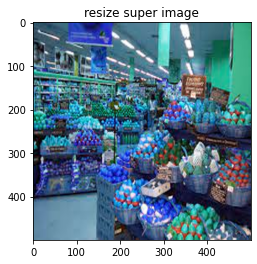

In [13]:
plt.imshow(mix_bgList[0])
plt.title('resize super image')
plt.show()

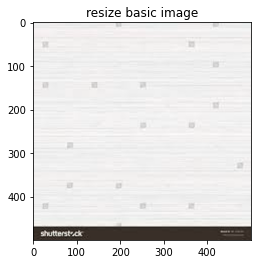

In [14]:
plt.imshow(mix_basic_bgList[0])
plt.title('resize basic image')
plt.show()

In [15]:
def rand_bbox(shape):
    """ 
   
    """
    # W,H : 일정 비율로 random하게 지정
    W = shape[1]
    H = shape[0]
    ratio = 2#np.random.randint(2,5) # W,H 비율 지정 2~5 
    cut_W = W // ratio
    cut_H = H // ratio

    #bounding box할 영역 / 좌상단 좌표
    bbx1 = np.random.randint(cut_W)
    bby1 = np.random.randint(cut_H)

    if bbx1 + cut_W >=W or bby1 + cut_H >=H :
        bbx2 = bbx1 - cut_W
        bby2 = bby1 - cut_H
    else:
        bbx2 = bbx1 + cut_W
        bby2 = bby1 + cut_H


    return bbx1, bby1, bbx2, bby2

In [16]:
#이미지 4분할해서 하기
def Division2Box(quad):

    W = IMG_W
    H = IMG_H

    cut_W = W // 2
    cut_H = H // 2

    bbox= [0,0,0,0]
    #random으로 위치 지정
    #quad = np.random.randint(1,4)
    # 1사분면
    if quad == 0:
        bbox[0] = 0
        bbox[1] = 0
        bbox[2] = cut_W
        bbox[3] = cut_H
    # 2사분면
    elif quad ==1:
        bbox[0] = cut_W
        bbox[1] = 0
        bbox[2] = W
        bbox[3] = cut_H

    # 3사분면
    elif quad == 2:
        bbox[0] = 0
        bbox[1] = cut_W
        bbox[2] = cut_W
        bbox[3] = H

    # 4사분면
    elif quad == 3:
        bbox[0] = cut_W
        bbox[1] = cut_H
        bbox[2] = W
        bbox[3] = H
    

    return bbox[0],bbox[1],bbox[2],bbox[3]



In [30]:
def crop_random_img(img_dir):
    temp = cv2.imread(img_dir,-1)
    image = cv2.cvtColor(temp, cv2.COLOR_BGR2BGRA)#COLOR_RGB2BGRA
    
    bbox = rand_bbox(temp.shape)

    x1 = bbox[0]
    y1 = bbox[1]
    x2 = bbox[2]
    y2 = bbox[3]

    crop_img = image[y1:y2, x1:x2,:]

    np_img = crop_img.astype(np.uint8)

    crop_resize = cv2.resize(np_img, (300,300), interpolation=cv2.INTER_CUBIC)
    #resize = cv2.cvtColor(crop_resize, cv2.COLOR_BGR2RGB)
    
    return crop_resize
    

In [31]:
def crop_4division_img(img_dir, division):
    temp = cv2.imread(img_dir,-1)

    image = cv2.cvtColor(temp, cv2.COLOR_BGR2BGRA)#COLOR_RGB2BGRA
    bbox = Division2Box(division)
    print(bbox)

    x1 = bbox[0]
    y1 = bbox[1]
    x2 = bbox[2]
    y2 = bbox[3]

    crop_img = image[y1:y2, x1:x2,:]

    np_img = crop_img.astype(np.uint8)

    crop_resize = cv2.resize(np_img, (500,500),interpolation=cv2.INTER_CUBIC)
    #resize = cv2.cvtColor(crop_resize, cv2.COLOR_BGR2RGB)

    return crop_resize
    

<class 'numpy.ndarray'>


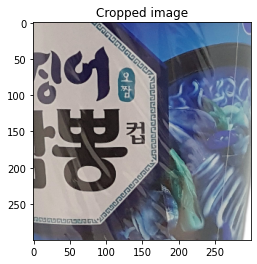

In [32]:
temp_crop_img = crop_random_img(remove_original_imgList[0][7])
print(type(temp_crop_img))
plt.imshow(temp_crop_img)
plt.title('Cropped image')
plt.show()

In [33]:
def crop_random_imgList(image_dir):
    crop_list = []
    img = cv2.imread(image_dir,-1)
    image = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)#COLOR_RGB2BGRA
    for i in range(5):
        bbox = rand_bbox()

        x1 = bbox[0]
        y1 = bbox[1]
        x2 = bbox[2]
        y2 = bbox[3]

        crop_img = image[y1:y2, x1:x2,:]

        np_img = crop_img.astype(np.uint8)

        crop_resize = cv2.resize(np_img, (300,300),interpolation=cv2.INTER_CUBIC)
        crop_list.append(crop_resize)
    #resize = cv2.cvtColor(crop_resize, cv2.COLOR_BGR2RGB)
    
    return crop_list
    

In [34]:
def mix_rand_background_bbox():
    """ 
   
    """
    # W,H : 일정 비율로 random하게 지정
    W = 500
    H = 500
    
    cut_W = 300
    cut_H = 300
    #bounding box할 영역 / 좌상단 좌표
    bbx1 = np.random.randint(cut_W)
    bby1 = np.random.randint(cut_H)


    #Width 계산
    if bbx1 + cut_W >=W:
        temp_x = cut_W - bbx1
        bbx1 = temp_x
    
    #Height 계산
    if bby1 + cut_H >=H:
        temp_y = cut_H - bby1
        bby1 = temp_y
    
    bbx2 = bbx1 + cut_W
    bby2 = bby1 + cut_H




    # if bbx1 + cut_W >=W or bby1 + cut_H >=H :
    #     abs_w = (bbx1 + cut_W) - W
    #     abs_h = (bby1 + cut_H) - H
    #     temp_x = bbx1 - abs_w
    #     temp_y = bby1 - abs_h

    #     bbx2 = bbx1
    #     bby2 = bby1

    #     bbx1 = temp_x
    #     bby1 = temp_y
    # else:
    #     bbx2 = bbx1 + cut_W
    #     bby2 = bby1 + cut_H


    return bbx1, bby1, bbx2, bby2

In [35]:
def input_crop_img(img2):
    return img2

In [36]:
def make_img(img_to_past, path_bg, save_path):
    # temp = cv2.imread(img_to_past, -1)
    img1 = path_bg
    img2 = img_to_past
    # img1 = cv2.imread(path_bg, -1)
    #img2 = cv2.resize(img_to_past, dsize=(300, 300), interpolation=cv2.INTER_AREA)
    h, w, depth = img1.shape
    
    # placeW =IMG_W//2
    # placeH = IMG_H//2 

    placeW = 300
    placeH = 300


    place_h = random.randrange(0,placeH)
    place_w = random.randrange(0,placeW)
    result = np.zeros((h, w, 3), np.uint8)

    mix_bbox = mix_rand_background_bbox()
    #mix_bbox[0], mix_bbox[1] - x1, y1 
    #mix_bbox[2], mix_bbox[3] - x2, y2
    x1 = mix_bbox[0]
    y1 = mix_bbox[1]

    x2 = mix_bbox[2]
    y2 = mix_bbox[3]

    #img2 - crop 라면 이미지 - 300, 300 # img1 - bg image

    # for i in range(h):
    #     for j in range(w):
    #         if (j>=x1 and i>=y1) and (j<=x2 and i<=y2):
    #             # 라면 이미지 input 위치
    #             color1 = img2[(j - x1-1), (i - y1-1)]
    #             # str_ = str(j - x1)+'__'+str(i - y1)
    #             # print(str_)
    #         else:
    #             color1 = img1[i, j]

    #         new_color = [color1[0], color1[1], color1[2]]
    #         result[i, j] = new_color

    

    for i in range(h):
        for j in range(w):
            if (j>=y1 and i>=x1) and (j<=y2 and i<=x2):
                color1 = img1[i, j]
                color2 = img2[(i - x1-1),(j - y1-1)]
                alpha = color2[3] / 255.0
                new_color = [ (1 - alpha) * color1[0] + alpha * color2[0],
                            (1 - alpha) * color1[1] + alpha * color2[1],
                            (1 - alpha) * color1[2] + alpha * color2[2] ]
                result[i, j] = new_color
            else:
                color1 = img1[i, j]
                new_color = [color1[0], color1[1], color1[2]]
                result[i, j] = new_color

    cv2.imwrite(save_path, result)


In [37]:
def make_img2original(img_to_past, path_bg, save_path):
    img1 = path_bg#cv2.imread(path_bg, -1)
    temp = cv2.imread(img_to_past, -1)
    
    placeW = 300
    placeH = 300

    img2 = cv2.resize(temp, dsize=(placeW, placeH), interpolation=cv2.INTER_AREA)
    h, w, depth = img1.shape
    
    place_h = random.randrange(0,h-placeH)
    place_w = random.randrange(0,w-placeW)

    result = np.zeros((h, w, 3), np.uint8)

    for i in range(h):
        for j in range(w):
            if i >= place_h and i < place_h + placeH and j >= place_w and j < place_w + placeW:
                color1 = img1[i, j]
                color2 = img2[i - place_h, j - place_w]
                alpha = color2[3] / 255.0
                new_color = [ (1 - alpha) * color1[0] + alpha * color2[0],
                            (1 - alpha) * color1[1] + alpha * color2[1],
                            (1 - alpha) * color1[2] + alpha * color2[2] ]
                result[i, j] = new_color
            else:
                color1 = img1[i, j]
                new_color = [color1[0], color1[1], color1[2]]
                result[i, j] = new_color

    cv2.imwrite(save_path, result)


In [38]:
len(remove_original_imgList)

10

In [39]:
#save_dir = 'D:/Classification/realData_original/random_crop_change_bg/'
#mix_bgList : super bg resize
crop_saveCount = 0
crop_bg_index = 0
crop_basic_index = 0

for i, original_img in enumerate(remove_original_imgList): #class  50개 폴더 있음 50번 돌아야함

    for img_index , temp_img in enumerate(original_img): # 1개 class 당 22개의 이미지 있음
        
        #crop_img_list = crop_random_imgList(temp_img)

        for crop_index in range(3): # 이미지 1개에 대해서 random crop 5번 
            crop_img = crop_random_img(temp_img)
            # plt.imshow(crop_img)
            # plt.title('Cropped image')
            # plt.show()
            #crop_img = crop_img_list[crop_index]
            for j, bg in enumerate(mix_bgList[crop_bg_index:crop_bg_index+5]): # 
                #print(save_dir_list[saveCount]+'/ch_bg_'+str(i)+'_img_'+str(j)+'.jpg')
                make_img(crop_img, bg, save_dir_list[crop_saveCount]+'/crop_img_'+str(img_index)+'_crop_'+str(crop_index)+'_ch_bg_'+str(i)+'_img_'+str(j)+'.jpg')

            for j, basic_bg in enumerate(mix_basic_bgList[crop_basic_index:crop_basic_index+5]):
                #print(save_dir_list[saveCount]+'/basic_bg_'+str(i)+'_img_'+str(j)+'.jpg')
                make_img(crop_img, basic_bg, save_dir_list[crop_saveCount]+'/crop_img_'+str(img_index)+'_crop_'+str(crop_index)+'_basic_bg_'+str(i)+'_img_'+str(j)+'.jpg')
  
            
        
    #     crop_bg_index+=5
    #     crop_basic_index+=5
    
    end_str = 'class'+str(crop_saveCount)+'end....'
    print(end_str)
    crop_saveCount +=1
    crop_bg_index = 0
    crop_basic_index = 0

    


       # make_img(crop_img, mix_bgList[i], save_dir_list[crop_saveCount]+'/crop_img_'+str(img_index)+'.jpg')

    

KeyboardInterrupt: 

In [27]:
mix_original_bgList= []

for temp in remove_imgList:
    bg = cv2.imread(temp, -1)
    #이미지 확장 코드
    plus_bg = cv2.resize(bg, (500,500),interpolation=cv2.INTER_CUBIC)
    mixImg = cv2.cvtColor(plus_bg, cv2.COLOR_BGR2RGB)
    mix_original_bgList.append(plus_bg)

len(mix_original_bgList)

110

In [29]:
mix_basic_bgList= []
for temp in basic_imgList:
    bg = cv2.imread(temp, -1)
    #이미지 확장 코드
    plus_bg = cv2.resize(bg, (500,500),interpolation=cv2.INTER_CUBIC)
    mixImg = cv2.cvtColor(plus_bg, cv2.COLOR_BGR2RGB)
    mix_basic_bgList.append(plus_bg)

len(mix_basic_bgList)

110

In [ ]:
for i in remove_original_imgList:
    print(i)

In [31]:
len(remove_original_imgList)

50

In [32]:
len(remove_original_imgList[0])

22

In [42]:
#save_dir = 'D:/Classification/realData_original/change_bg/'

saveCount = 0
#라면 이미지 하나에 background 다른게 5장 
#현재 background 110장
bg_index = 0
basic_index = 0

# 1 image(라면 이미지) -> 10개 
# 22 image -> 220개 

for i, original_img in enumerate(remove_original_imgList): #class  50개 폴더 있음 50번 돌아야함

    for img_index , temp_img in enumerate(original_img): # 1개 class 당 22개의 이미지 있음

        for j, bg in enumerate(mix_original_bgList[bg_index:bg_index+5]):
            #print(save_dir_list[saveCount]+'/ch_bg_'+str(i)+'_img_'+str(j)+'.jpg')
            make_img2original(temp_img, bg, save_dir_list[saveCount]+'/img_'+str(img_index)+'_ch_bg_'+str(i)+'_img_'+str(j)+'.jpg')
        bg_index+=5

        for j, bg in enumerate(mix_basic_bgList[basic_index:basic_index+5]):
            #print(save_dir_list[saveCount]+'/basic_bg_'+str(i)+'_img_'+str(j)+'.jpg')
            make_img2original(temp_img, bg, save_dir_list[saveCount]+'/img_'+str(img_index)+'_basic_bg_'+str(i)+'_img_'+str(j)+'.jpg')
        basic_index+=5
    
    end_str = 'class'+str(saveCount)+'end....'
    print(end_str)
    saveCount +=1
    bg_index = 0
    basic_index = 0
    


    # if (i+1) %22 == 0:
    #     saveCount +=1
    #     bg_index = 0
    #     basic_index = 0
    #     print(saveCount)

print('end')

class0end....
class1end....
class2end....
class3end....
class4end....
class5end....
class6end....
class7end....
class8end....
class9end....
class10end....
class11end....
class12end....
class13end....
class14end....
class15end....
class16end....
class17end....
class18end....
class19end....
class20end....
class21end....
class22end....
class23end....
class24end....
class25end....
class26end....
class27end....
class28end....
class29end....
class30end....
class31end....
class32end....
class33end....
class34end....
class35end....
class36end....
class37end....
class38end....
class39end....
class40end....
class41end....
class42end....
class43end....
class44end....
class45end....
class46end....
class47end....
class48end....
class49end....
end
